In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\sharm\Downloads\Advertising.csv")

In [4]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


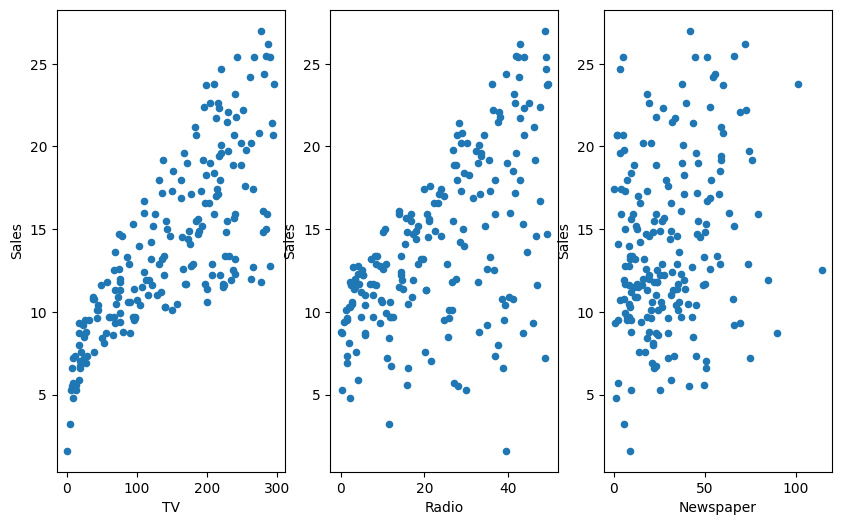

In [5]:
#create multiple subplots within a single figure
#plt.subplots: creates a figure and a set of subplots (axes). 1->rows, 3->columns
#fig: The figure container for all subplots.
#axs: Since you have 3 subplots in a single row, axs will be a 1D NumPy array containing 3 elements (one for each subplot).
#You can index it like axs[0], axs[1], etc.
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(10,6))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [12]:
#Create and fit a simple linear regression model
lm=LinearRegression()

In [14]:
#The double square brackets [['TV']] ensure the result is a DataFrame (not a Series). 
x=data[['TV']]

#single square brackets or the dot operator (data.Sales) return a Series (1D array-like object).
y=data.Sales

In [16]:
# .fit(): It is used to train a model by learning from the provided data.
lm.fit(x,y)

LinearRegression()

In [18]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [20]:
#Now predict if we spent 50000$, then how much we sell in widgets.
#The double brackets [[value]] ensure the input is a 2D array, which is the expected input format for predict() in scikit-learn.
lm.predict([[50]])

array([9.40942557])

### How least Sqaures line changes based on input data (Just for Demo Purpose )
https://www.desmos.com/

## Model confidence
--> How well Does the model fit the data.?

One of the most generic way to evaluate to fit of the linear model is by computing the R-Sqaured value R sqaured explains the proportion of variance .i.e., the proportion of variance in the observed data which the model explains .or the reduction in error over the null model .(A null model only predicts the mean of all the observed response and thus it only has an intercept and no slope )

The value of R-squared lies between 0 and 1 . A value closer to 1 better as it means that more variance is explained by the model.

If my model giving me a good confidence like 80% 82% 85% 90 % based on that i can think how close it is to that.

we are going to understand how good is my model .

if my model learn verygood the confidence is also increased . when we are predicting .\

### On what basis i am saying..? My model in this much percent confident .
From the past data.and i learned from the past data . the i say. My confidence level depend on how i learned , or trained

That where R^2 Statistics Comes.

## R^2 Statistics -->
The R-Squared Statistics provides a measure of fit . it takes the form of proportion of variance explained also so it always takes on a value between 0 and 1. In simple word . It represent how much of our data is being explained by our model data is being explained by our model . For example - , R-Square statistics =0.75 . it says that our model fits 75% of the total dataset .similarly if it is 0, it means none of the data points is being explained and A Value of 1 Represent 100% data explaination.

R^2 = TSS - RSS / TSS = 1 - RSS/TSS

where RSS is the Residual Sum of Sqaure and in given as ..

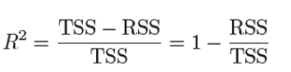

RSS is the residual (error) term we have been talking about so far. And ,TSS is the total sum of square and givern as ..

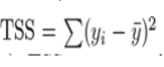

TSS is calculated when we consider the line passing through the mean value of y . to be the best fit line . Just Like RSS , we calculating the error term when the best fit line passing through the mean value of Y and we get the values of TSS .

TSS - Difference between actual and the mean is a total sum of square.

The closer the value of R^2 comes bellow 0 (which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.

In [22]:
# rss= actual - predicted
# tss= actual - mean of actual values

## Metric to check Model performance ( R^2 Score)

In [30]:
from sklearn.metrics import r2_score

This r2 the techniques that we used to evaluate (Evaluate Means - How Good it is , How Bad It is , How Well its Performing)the model.Technically we call as metrics.

There are lots of metrics

all metrics are availabe in sklearn.metrics

In [32]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [34]:
#pass all records and predict the sales

prediction=lm.predict(x)
prediction

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [46]:
#Lets compare original sales numbers with our model predicted sales.

#pass actual and predicted values
r2_score(y_true=y,y_pred = prediction)

0.611875050850071

In [48]:
#our model is 61% accurate/good

## Adjusted R^2 Statistics
A Metric for Model Evaluation
Adjusted R-squared is a modified version of the R-squared metric. It adjusts for the number of predictors (independent variables) in the model.

## Why we dont use R^2. Why are we using Different metric.
The R-squared value indicates how well the independent variables explain the variability in the dependent variable. It ranges between 0 and 1 (0% to 100%) and will never exceed 100%. However, R-squared has a limitation:

In multiple linear regression, as you add more features (independent variables), the R-squared value tends to increase—even if the new features do not actually improve the model.
This increase in R-squared can be misleading because it does not reflect whether the added features have any real correlation with the output variable.

## Adjusted R^2 Statistics 
The Adjusted R-squared addresses this issue. It penalizes the model for adding irrelevant or excessive features that do not improve the prediction. In other words, it prevents overfitting caused by unnecessarily adding predictors.

If a new feature does not contribute significantly, the adjusted R-squared will decrease, balancing the model evaluation.
This penalty ensures a more reliable evaluation of how well the model fits the data.

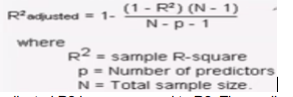

We can see that 
 always increase with an increasae in the number of independent variables Thus it doesnot give better picture and so we nees adjusted 
 value to keep this check mathematically it is calculated as

image-2.png

where 
R^2= Sample R- sqaure

N = Number of record, Number of observation, Number of Rows .

P = Number of columns, Number of Feature, Independent variables.

In the equation above , when p==0 , can see the adjusted R^2 will always be less that or equal to, and it penalise the excess of independent variables which do not affect the dependent variables.

## Is is a "Good" R-Squared values?
Determining a "good" R-squared value depends heavily on the domain of the data and the specific application:

For some fields (e.g., physics or engineering), a very high R-squared value is expected.
In other domains (e.g., social sciences or economics), a lower R-squared value might still be acceptable due to the complexity of the data.
Thus, R-squared and adjusted R-squared are tools for comparing models and evaluating performance, but they must be interpreted in context.

## Multiple Linear Regression 
Till Now, we have created the model based on only one Feature now will include multiple feature and create a model to see the relatioship between those features and the label column. This is calles Multiple Linear Regression.

𝑦 = 𝛽0 + 𝛽1𝑥1+. . . +𝛽𝑛𝑥𝑛

Each x represents a different feature and each feature has its own coefficient .

In this case

y=c + m1x1 + m2x2....

or

𝑦 = 𝛽 +𝛽1 × 𝑇𝑉 + 𝛽2 × 𝑅𝑎𝑑𝑖𝑜 + 𝛽3 × 𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒�

Lets use statsmodels to estimate the coefficients

In [59]:
#create x and y

x=data[['TV','Radio','Newspaper']]

y=data.Sales

In [63]:
lm=LinearRegression()

In [78]:
lm.fit(x,y)

LinearRegression()

In [80]:
print(lm.intercept_)
print(lm.coef_) #coeff of TV, Radio, Newspaper respectively

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


##### How do we interpret these coefficients?

If we look at the coefficients, the coefficient for newspaper spending is negative. This means that the money spent on newspaper advertisements is not contributing positively to sales.

## Lets Understand about Coefficient
##### What does the coefficient actually mean?
If there is an investment of 1 extra unit, the coefficient tells us how much the sales will increase from the existing point. This helps us understand the relationship through correlation. It means that if you invest one additional unit, your sales are going to increase by this much.

There is a relationship between TV vs Sales.

There is a relationship between Radio vs Sales.

There is no positive relationship between Newspaper vs Sales.
This means that you should not invest in newspaper advertisements.

## Feature Selection
How do i decide which feature has to be included in a linear model? Heres one idea ..

---> Check if the R-Squared goes up when you add new pedictors to the model.

In [104]:
##Preparing data for R- Square  Score  on TV and Radio as we can see they are  positively related -
# - (Coefficient.)
x=data[['TV','Radio']]
y=data.Sales

In [106]:
#Lets feed feature add label and trained the model
lm.fit(x,y)

LinearRegression()

In [108]:
r2_score(y,prediction)

0.8972106381789522

In [ ]:
#Lets do something for all features

In [111]:
x=data[['TV','Radio','Newspaper']]
y=data.Sales

In [113]:
lm.fit(x,y)

LinearRegression()

In [115]:
prediction=lm.predict(x)

In [117]:
r2_score(y,prediction)

0.8972106381789522

Selecting the model with the highest R-squared value is not a correct approach, as the R-squared value will always increase when a new feature is added, even if the feature is unrelated to the response.

An alternative is to use Adjusted R-squared, which penalizes model complexity to control overfitting. However, it may still under-penalize complexity in some cases.

A better approach to feature selection is cross-validation. It provides a more reliable method for choosing which of the created models will best generalize, as it offers a better estimate of out-of-sample error.

An advantage of cross-validation is that it can be applied to any machine learning model. Additionally, the scikit-learn package provides extensive functionality to perform cross-validation efficiently.